# Basic stats about r/ADHD

In [1]:
from psaw import PushshiftAPI
import pandas as pd

In [2]:
api = PushshiftAPI()

## Post and comment frequency

In [3]:
# All submissions to r/Overwatch per month since subreddit debut)
gen = api.search_submissions(subreddit = "adhd", aggs="created_utc", frequency="month")
data = next(gen)

In [4]:
posts = pd.DataFrame(data['created_utc'])
posts['key'] = pd.to_datetime(posts['key'].astype(int), unit='s')
posts = posts.rename(columns = {
    'doc_count': 'n_posts'
})
 

In [5]:
# All comments to r/Overwatch per month since subreddit debut)
gen = api.search_comments(subreddit = "adhd", aggs="created_utc", frequency="month")
data = next(gen)
data

{'created_utc': [{'doc_count': 1, 'key': 1238544000},
  {'doc_count': 1, 'key': 1241136000},
  {'doc_count': 3, 'key': 1243814400},
  {'doc_count': 0, 'key': 1246406400},
  {'doc_count': 0, 'key': 1249084800},
  {'doc_count': 0, 'key': 1251763200},
  {'doc_count': 0, 'key': 1254355200},
  {'doc_count': 1, 'key': 1257033600},
  {'doc_count': 1, 'key': 1259625600},
  {'doc_count': 0, 'key': 1262304000},
  {'doc_count': 0, 'key': 1264982400},
  {'doc_count': 0, 'key': 1267401600},
  {'doc_count': 1, 'key': 1270080000},
  {'doc_count': 0, 'key': 1272672000},
  {'doc_count': 2, 'key': 1275350400},
  {'doc_count': 0, 'key': 1277942400},
  {'doc_count': 0, 'key': 1280620800},
  {'doc_count': 0, 'key': 1283299200},
  {'doc_count': 0, 'key': 1285891200},
  {'doc_count': 0, 'key': 1288569600},
  {'doc_count': 0, 'key': 1291161600},
  {'doc_count': 0, 'key': 1293840000},
  {'doc_count': 0, 'key': 1296518400},
  {'doc_count': 1, 'key': 1298937600},
  {'doc_count': 6, 'key': 1301616000},
  {'doc_co

In [6]:
comments = pd.DataFrame(data['created_utc'])
comments['key'] = pd.to_datetime(comments['key'].astype(int), unit='s')
comments = comments.rename(columns = {
    'doc_count': 'n_comments'
})

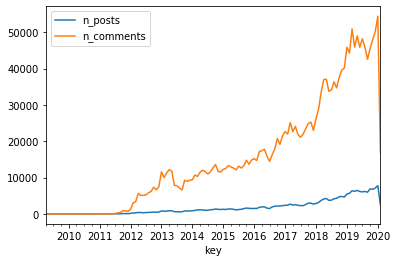

In [7]:
counts = pd.merge(posts, comments)
plot = counts.set_index('key').plot()
plot

In [8]:
total_posts = posts["n_posts"].sum()
total_comments = comments["n_comments"].sum()

print(f"posts: {total_posts}, comments: {total_comments}")

# estimated_size = total/1000*3.64
# num_of_files = total/1000

posts: 230338, comments: 2013734
